In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as preproc
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree,metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [29]:
data=pd.read_csv('AllFeatures.csv')
df = pd.read_excel('DATACASE1.xlsx')
X=np.array(data)
y=np.array(df.LoadFactor)

In [30]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=386) # found to be the optimal num of features for random forest
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=42)

In [32]:
y_test_idx=[list(y).index(el) for el in y_test]

In [33]:
model= RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
y_pred=model.predict(X_test)

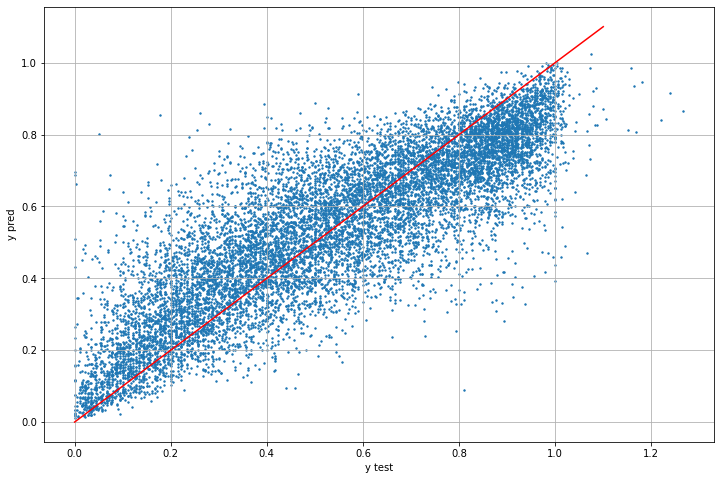

In [35]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,y_pred,s=2)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1),'r')
#plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

In [36]:
np.mean(np.abs((y_test-y_pred)))

0.11288416451416335

In [37]:
np.mean((y_test-y_pred)**2)

0.02136377622564399

In [38]:
def estimated_total_accuracy(y,y_esti,SC_non_norm):
    #Deviation per flight = (Actual passengers – Forecasted passengers) / Actual passengers per flight
    #Accuracy per flight = 100% - | Deviation per flight |
    
    Actual_pass=np.array(y).T*SC_non_norm
    Forecast_pass=y_esti.T*SC_non_norm
    
    ind0=np.where(Actual_pass==0)[0]
    
    Actual_pass= np.delete(Actual_pass,ind0)
    Forecast_pass= np.delete(Forecast_pass,ind0)

    Dev= (np.abs(Actual_pass-Forecast_pass))/Actual_pass

    Exp_acc= 1-Dev
    T_exp_acc=np.mean(Exp_acc)*100

    return T_exp_acc


def compute_mse(X,beta,y):
    yhat = np.matmul(X, beta)
    res = (y - yhat) ** 2    
    mse = np.mean(res)
    
    return mse, res, yhat

In [39]:
SC_non_norm=np.array(df.SeatCapacity[y_test_idx])

In [40]:
T_ex_acc=estimated_total_accuracy(y_test,y_pred,SC_non_norm)
print('Total Expected Accuracy:',T_ex_acc)

Total Expected Accuracy: 58.53202661836722


### Compute accuracy using CV

In [41]:
K=5
kf = KFold(n_splits=K)
Accuracy=np.zeros(K)

for i, (train_index, test_index) in enumerate(kf.split(X_selected)):
    X_train = X_selected[train_index]
    y_train = y[train_index]
    X_test = X_selected[test_index]
    y_test = y[test_index]
    y_test_idx=[list(y).index(el) for el in y_test]
    # train model
    model= RandomForestRegressor(n_jobs=-1) # we leave all the values at DEFAULT
    model.fit(X_train,y_train)
    # predict model
    y_pred=model.predict(X_test)
    SC_non_norm=np.array(df.SeatCapacity[y_test_idx])
    T_ex_acc=estimated_total_accuracy(y_test,y_pred,SC_non_norm)
    Accuracy[i]=T_ex_acc;print('Total Expected Accuracy:',T_ex_acc)
    
np.mean(Accuracy)

Total Expected Accuracy: 7.8607783477555175
Total Expected Accuracy: 45.36147378648482
Total Expected Accuracy: 27.088599263584545
Total Expected Accuracy: 26.980381172007306
Total Expected Accuracy: 52.54737270019082


31.967721054004606